In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

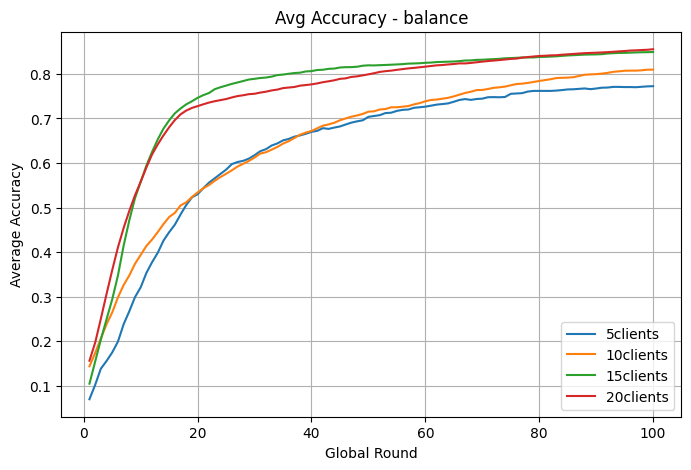

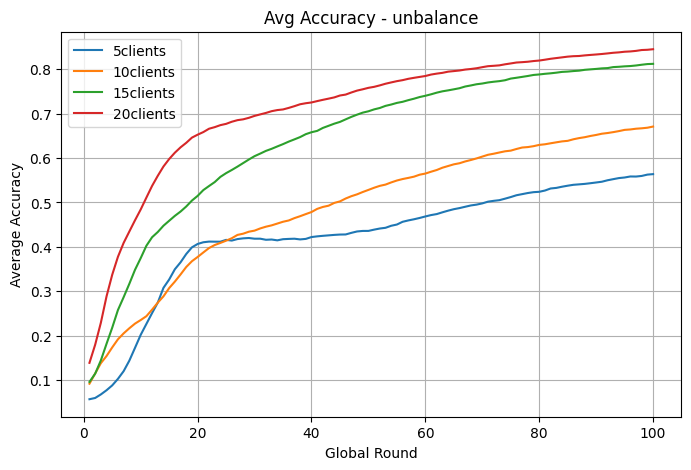

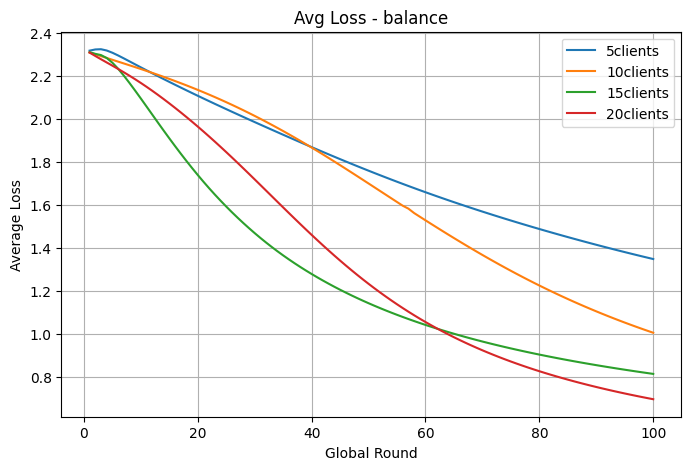

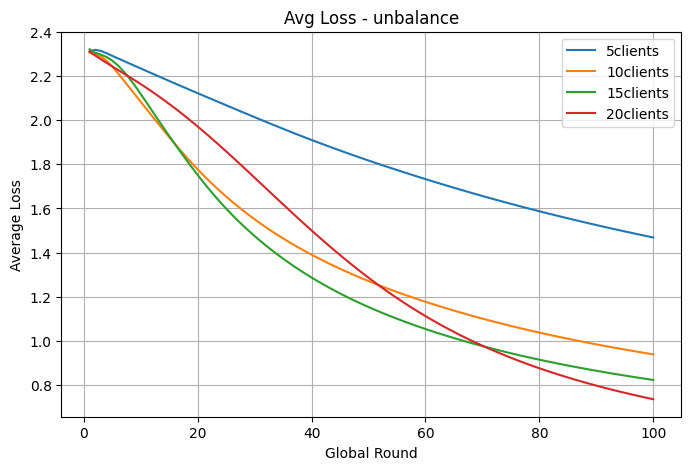

In [5]:
base_dir = "../results"
experiments = {
    "balance": os.path.join(base_dir, "balance_class"),
    "unbalance": os.path.join(base_dir, "unbalance_class")
}

results = {"accuracy": {"balance": {}, "unbalance": {}},
           "loss": {"balance": {}, "unbalance": {}}}

for exp_type, exp_path in experiments.items():
    for n_clients in ["5clients", "10clients", "15clients", "20clients"]:
        csv_path = os.path.join(exp_path, n_clients, "data.csv")
        if not os.path.exists(csv_path):
            continue

        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip().str.replace('"', '')

        df_acc = df.groupby("global_round")["accuracy"].mean()
        df_loss = df.groupby("global_round-2")["loss"].mean()
        df_loss.index.name = "global_round"

        results["accuracy"][exp_type][n_clients] = df_acc
        results["loss"][exp_type][n_clients] = df_loss

# Vẽ chart cho từng loại
for metric in ["accuracy", "loss"]:
    for exp_type in ["balance", "unbalance"]:
        plt.figure(figsize=(8,5))
        for n_clients, series in results[metric][exp_type].items():
            plt.plot(series.index, series.values, label=n_clients)
        plt.xlabel("Global Round")
        plt.ylabel(f"Average {metric.capitalize()}")
        plt.title(f"Avg {metric.capitalize()} - {exp_type}")
        plt.legend()
        plt.grid(True)
        plt.show()
